In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

ml_case_study = pd.read_csv('ML case Study.csv')
colleges = pd.read_csv('Colleges.csv')
cities = pd.read_csv('cities.csv')

def assign_college_tier(college_name):
    if college_name in colleges['Tier 1'].values:
        return 1
    elif college_name in colleges['Tier 2'].values:
        return 2
    elif college_name in colleges['Tier 3'].values:
        return 3
    return None

ml_case_study['College Tier'] = ml_case_study['College'].apply(assign_college_tier)

def assign_city_type(city_name):
    if city_name in cities['Metrio City'].values:
        return 1
    elif city_name in cities['non-metro cities'].values:
        return 0
    return None

ml_case_study['City Type'] = ml_case_study['City'].apply(assign_city_type)

ml_case_study['Role'] = ml_case_study['Role'].map({'Manager': 1, 'Executive': 0})

ml_case_study = ml_case_study.drop(['College', 'City'], axis=1)

print(ml_case_study.isnull().sum())

ml_case_study = ml_case_study.dropna()  

print(ml_case_study.isnull().sum())

ml_case_study.head()


Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
College Tier           0
City Type              0
dtype: int64
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
College Tier           0
City Type              0
dtype: int64


Role  Previous CTC  Previous job change  Graduation Marks  EXP (Month)  \
0     1       55523.0                    3                66           19   
1     0       57081.0                    1                84           18   
2     0       60347.0                    2                52           28   
3     0       49010.0                    2                81           33   
4     0       57879.0                    4                74           32   

        CTC  College Tier  City Type  
0  71406.58             2          0  
1  68005.87             2          0  
2  76764.02             3          0  
3  82092.39             3          0  
4  73878.10             1          0

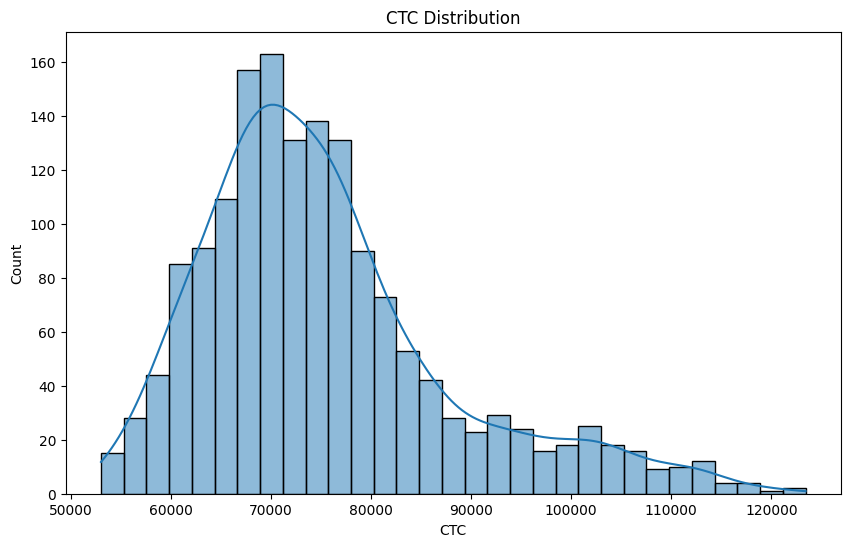

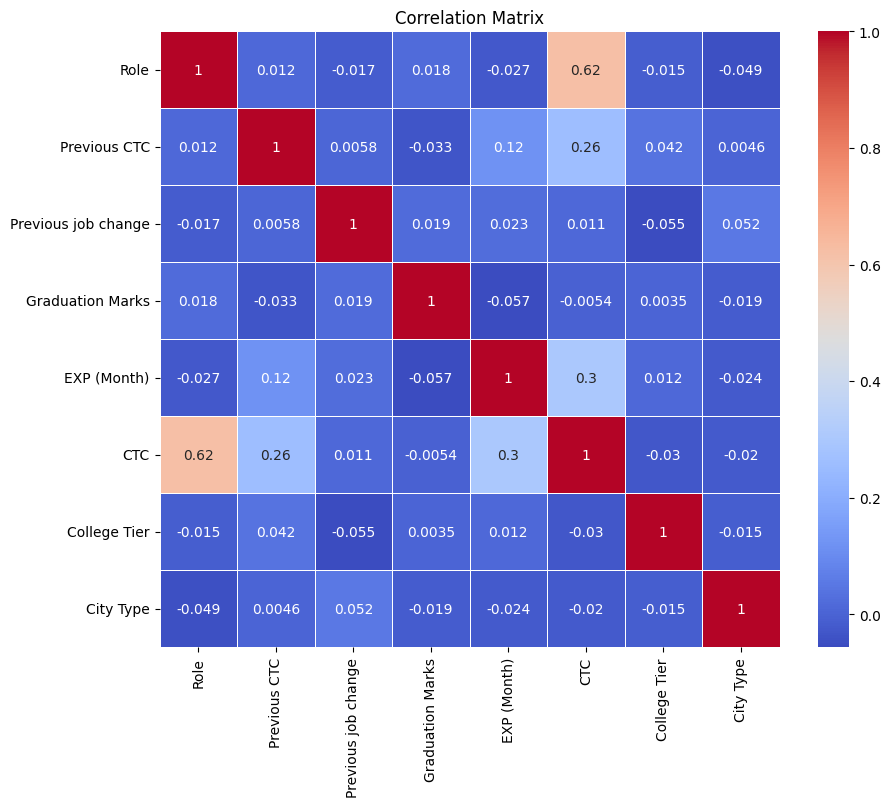

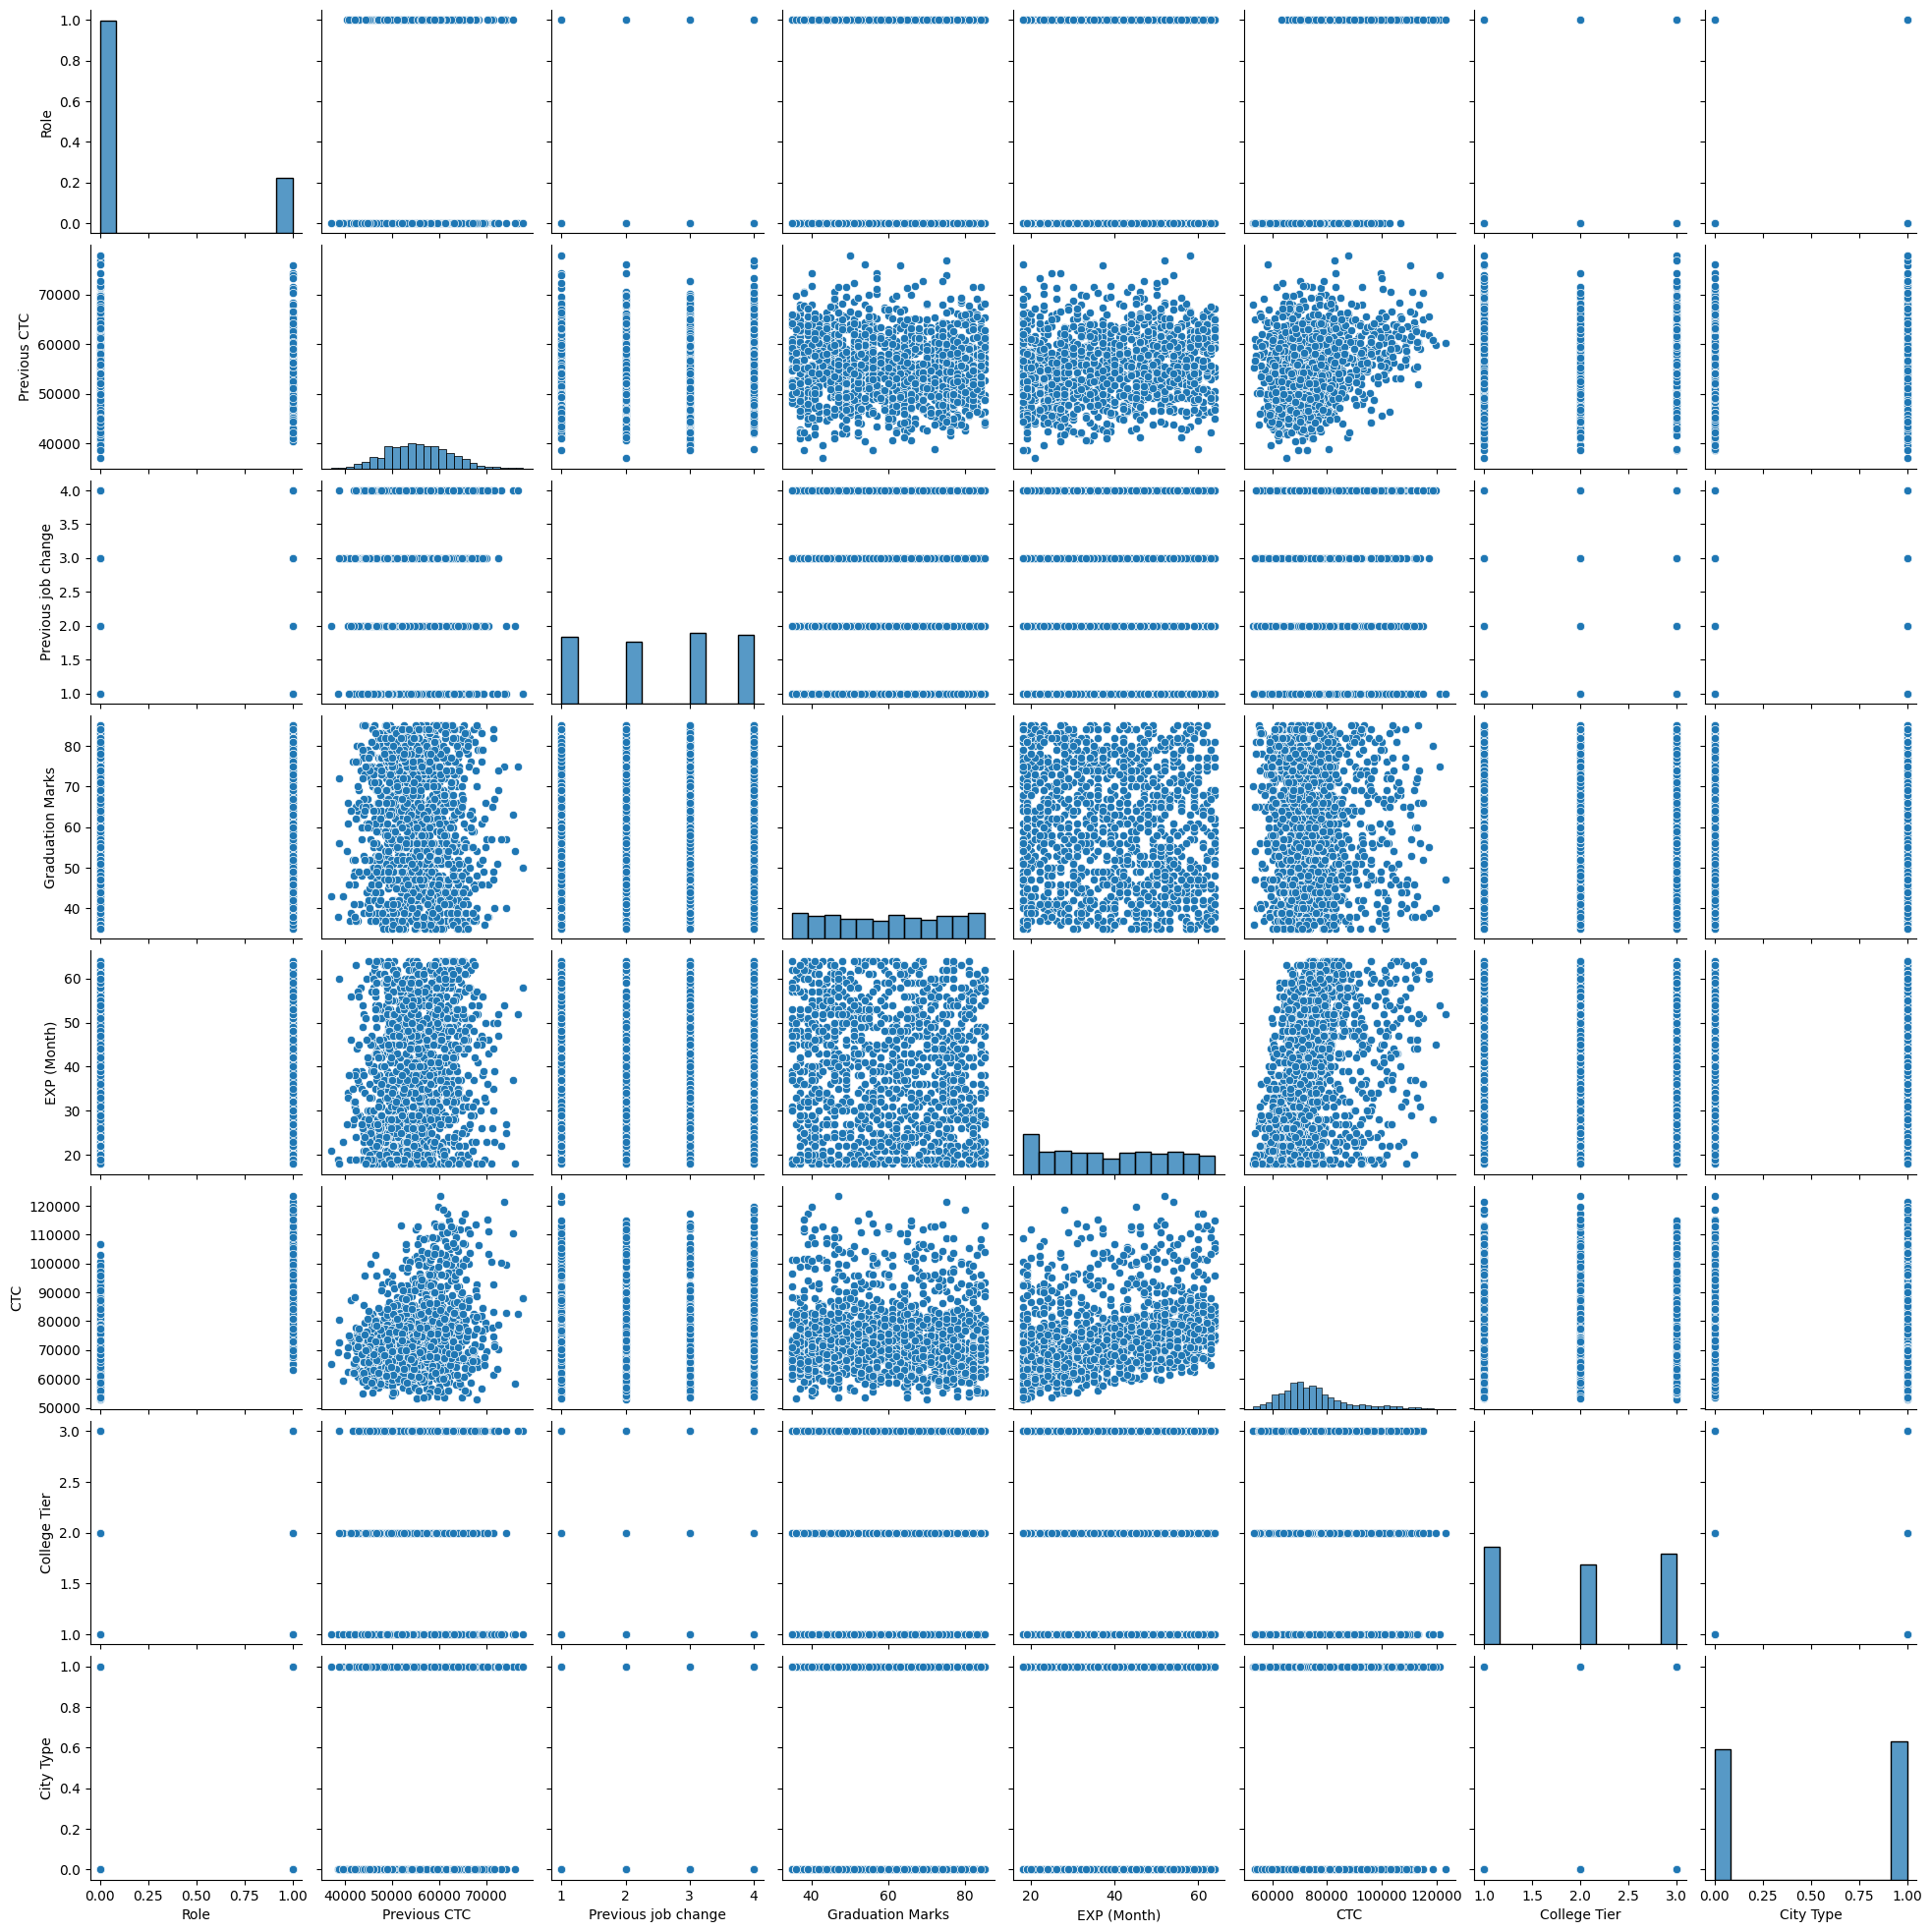

In [2]:
plt.figure(figsize=(10,6))
sns.histplot(ml_case_study['CTC'], kde=True)
plt.title('CTC Distribution')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(ml_case_study.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(ml_case_study)
plt.show()


In [3]:
X = ml_case_study[['College Tier', 'City Type', 'Role', 'Previous CTC', 'Previous job change', 'Graduation Marks', 'EXP (Month)']]
y = ml_case_study['CTC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_pred = linear_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression MSE: {mse}')
print(f'Linear Regression R^2: {r2}')

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f'Random Forest MSE: {rf_mse}')
print(f'Random Forest R^2: {rf_r2}')


Linear Regression MSE: 77362774.94956557
Linear Regression R^2: 0.5933517958385082
Random Forest MSE: 67938201.74540497
Random Forest R^2: 0.6428909413895681


In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')

# Use the best model from grid search
best_rf_model = grid_search.best_estimator_

y_tuned_pred = best_rf_model.predict(X_test)

tuned_mse = mean_squared_error(y_test, y_tuned_pred)
tuned_r2 = r2_score(y_test, y_tuned_pred)

print(f'Tuned Random Forest MSE: {tuned_mse}')
print(f'Tuned Random Forest R^2: {tuned_r2}')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest MSE: 68549224.65477952
Tuned Random Forest R^2: 0.6396791723060435


In [7]:
new_data = pd.DataFrame({
    'College Tier': [2],  # Example: Tier 2
    'City Type': [0],     # Example: Non-metro city
    'Role': [1],          # Example: Manager
    'Previous CTC': [60000],  # Example: 60,000
    'Previous job change': [2],
    'Graduation Marks': [75],
    'EXP (Month)': [36]
})

new_data_scaled = scaler.transform(new_data)

predicted_salary = best_rf_model.predict(new_data_scaled)

print(f'Predicted Salary: {predicted_salary[0]}')


Predicted Salary: 70659.84215000004


C:\Users\Desh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [8]:
new_data = pd.DataFrame({
    'College Tier': [2],      
    'City Type': [0],         
    'Role': [1],              
    'Previous CTC': [60000],  
    'Previous job change': [2],
    'Graduation Marks': [75],
    'EXP (Month)': [36]
})

new_data = new_data[['College Tier', 'City Type', 'Role', 'Previous CTC', 'Previous job change', 'Graduation Marks', 'EXP (Month)']]

new_data_scaled = scaler.transform(new_data)

predicted_salary = best_rf_model.predict(new_data_scaled)

print(f'Predicted Salary: {predicted_salary[0]}')


Predicted Salary: 70659.84215000004


C:\Users\Desh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [9]:
import pandas as pd
import numpy as np

new_data = pd.DataFrame({
    'College Tier': [2],      
    'City Type': [0],         
    'Role': [1],              
    'Previous CTC': [60000],   
    'Previous job change': [2],
    'Graduation Marks': [75],
    'EXP (Month)': [36]
})

new_data = new_data[['College Tier', 'City Type', 'Role', 'Previous CTC', 'Previous job change', 'Graduation Marks', 'EXP (Month)']]

new_data_scaled = scaler.transform(new_data)

predicted_salary = best_rf_model.predict(new_data_scaled)

print(f'Predicted Salary: {predicted_salary[0]}')


Predicted Salary: 70659.84215000004


C:\Users\Desh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [13]:

new_data = pd.DataFrame({
    'College Tier': [2],  
    'City Type': [0],     
    'Role': [1],          
    'Previous CTC': [60000],  
    'Previous job change': [2],
    'Graduation Marks': [75],
    'EXP (Month)': [36]
})

# Scale the new data
new_data_scaled = scaler.transform(new_data)

predicted_salary = best_rf_model.predict(new_data_scaled)

print(f'Predicted Salary: {predicted_salary[0]}')



Predicted Salary: 70659.84215000004


C:\Users\Desh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [14]:
train_columns = ['College Tier', 'City Type', 'Role', 'Previous CTC', 
                 'Previous job change', 'Graduation Marks', 'EXP (Month)']

new_data = pd.DataFrame({
    'College Tier': [2],      # Example: Tier 2
    'City Type': [0],         # Example: Non-metro city
    'Role': [1],              # Example: Manager
    'Previous CTC': [60000],  # Example: 60,000
    'Previous job change': [2],
    'Graduation Marks': [75],
    'EXP (Month)': [36]
})

new_data = new_data[train_columns]


In [15]:
new_data_scaled = scaler.transform(new_data)


In [16]:
predicted_salary = best_rf_model.predict(new_data_scaled)

print(f'Predicted Salary: {predicted_salary[0]}')


Predicted Salary: 70659.84215000004


C:\Users\Desh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor



train_columns = ['College Tier', 'City Type', 'Role', 'Previous CTC', 
                 'Previous job change', 'Graduation Marks', 'EXP (Month)']

new_data = pd.DataFrame({
    'College Tier': [2],      
    'City Type': [0],         
    'Role': [1],              
    'Previous CTC': [60000],  
    'Previous job change': [2], 
    'Graduation Marks': [75], 
    'EXP (Month)': [36]      
})

new_data = new_data[train_columns]

new_data_scaled = scaler.transform(new_data)

predicted_salary = best_rf_model.predict(new_data_scaled)

print(f'Predicted Salary: {predicted_salary[0]}')


Predicted Salary: 70659.84215000004


C:\Users\Desh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


data = {
    'College Tier': [1, 2, 1, 3, 2],
    'City Type': [0, 1, 0, 1, 0],
    'Role': [0, 1, 1, 0, 1],  # Assuming 0 = Junior, 1 = Manager
    'Previous CTC': [50000, 60000, 70000, 45000, 50000],
    'Previous job change': [1, 2, 1, 0, 3],
    'Graduation Marks': [80, 75, 85, 70, 78],
    'EXP (Month)': [12, 24, 36, 18, 30],
    'Salary': [65000, 70000, 75000, 60000, 68000]  # Target variable
}
df = pd.DataFrame(data)

X = df[['College Tier', 'City Type', 'Role', 'Previous CTC', 
         'Previous job change', 'Graduation Marks', 'EXP (Month)']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  

best_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

predictions = best_rf_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

train_columns = ['College Tier', 'City Type', 'Role', 'Previous CTC', 
                 'Previous job change', 'Graduation Marks', 'EXP (Month)']

new_data = pd.DataFrame({
    'College Tier': [2],      # Example: Tier 2
    'City Type': [0],         # Example: Non-metro city
    'Role': [1],              # Example: Manager
    'Previous CTC': [60000],  # Example: Previous CTC
    'Previous job change': [2], 
    'Graduation Marks': [75], 
    'EXP (Month)': [36]      
})

new_data = new_data[train_columns]

new_data_scaled = scaler.transform(new_data)

predicted_salary = best_rf_model.predict(new_data_scaled)

print(f'Predicted Salary: {predicted_salary[0]}')


Mean Absolute Error: 3480.0
Predicted Salary: 69230.0


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

y_test = ... 
y_pred = best_rf_model.predict(X_test)  

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')


C:\Users\Desh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


InvalidParameterError: The 'y_true' parameter of mean_squared_error must be an array-like. Got Ellipsis instead.

In [21]:
from sklearn.metrics import mean_squared_error, r2_score


y_pred = best_rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')


C:\Users\Desh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


InvalidParameterError: The 'y_true' parameter of mean_squared_error must be an array-like. Got Ellipsis instead.

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


X = ...  
y = ...  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_rf_model = RandomForestRegressor()
best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')


TypeError: Singleton array array(Ellipsis, dtype=object) cannot be considered a valid collection.

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('ML case Study.csv')  

X = ml_case_study[['College Tier', 'City Type', 'Role', 'Previous CTC', 'Previous job change', 'Graduation Marks', 'EXP (Month)']]
y = ml_case_study['CTC']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_rf_model = RandomForestRegressor(random_state=42)  
best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')


Mean Squared Error: 67938201.74540497
R-squared: 0.6428909413895681


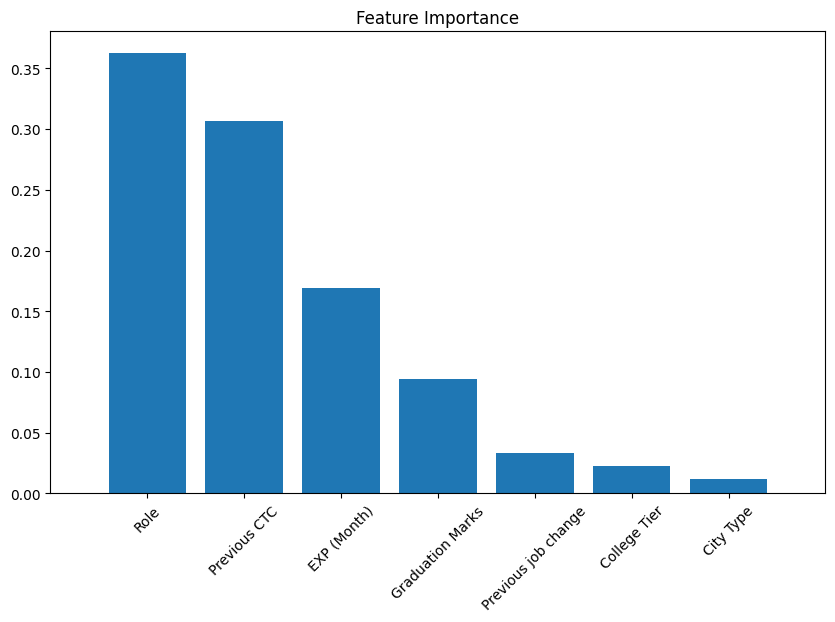

In [26]:
import matplotlib.pyplot as plt
import numpy as np

importances = best_rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=RandomForestRegressor(), 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)

grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [28]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

cv_mse = -cv_scores
print(f'Cross-Validation MSE: {cv_mse.mean()} ± {cv_mse.std()}')


Cross-Validation MSE: 54366869.536086224 ± 16728473.875516186


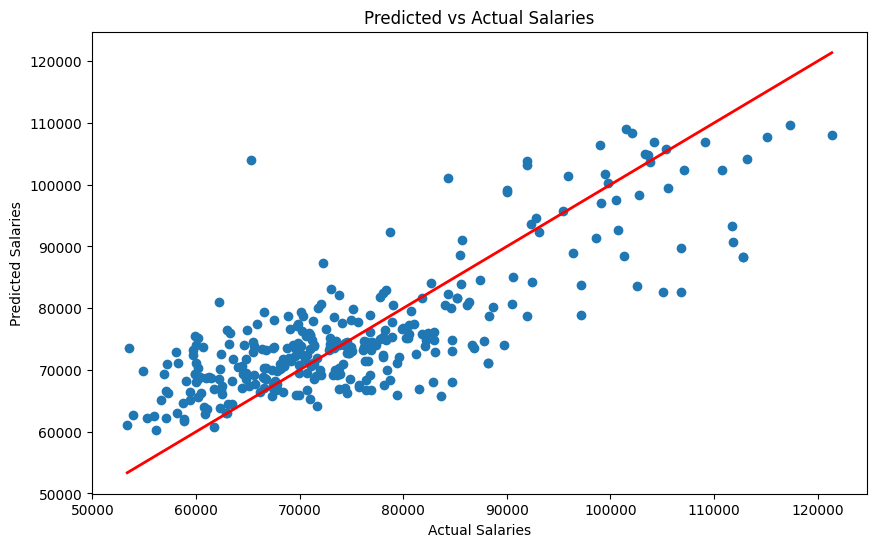

In [29]:
y_pred = best_rf_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  
plt.title("Predicted vs Actual Salaries")
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.show()


   College Tier  City Type  Role  Previous CTC  Previous job change  \
0             1          0     0         50000                    1   
1             2          1     1         60000                    2   
2             1          0     1         70000                    1   
3             3          1     0         45000                    0   
4             2          0     1         50000                    3   

   Graduation Marks  EXP (Month)  Salary  
0                80           12   65000  
1                75           24   70000  
2                85           36   75000  
3                70           18   60000  
4                78           30   68000  
       College Tier  City Type      Role  Previous CTC  Previous job change  \
count       5.00000   5.000000  5.000000           5.0             5.000000   
mean        1.80000   0.400000  0.600000       55000.0             1.400000   
std         0.83666   0.547723  0.547723       10000.0             1.140175   

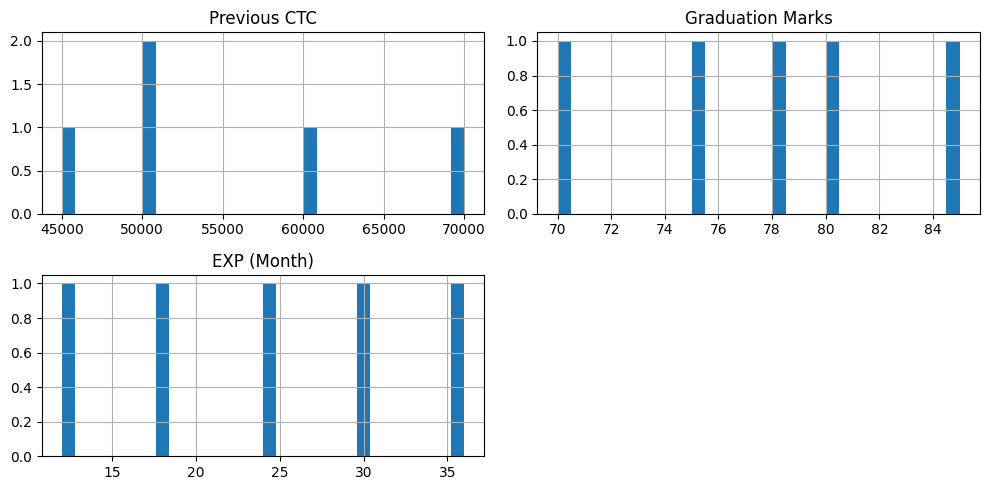

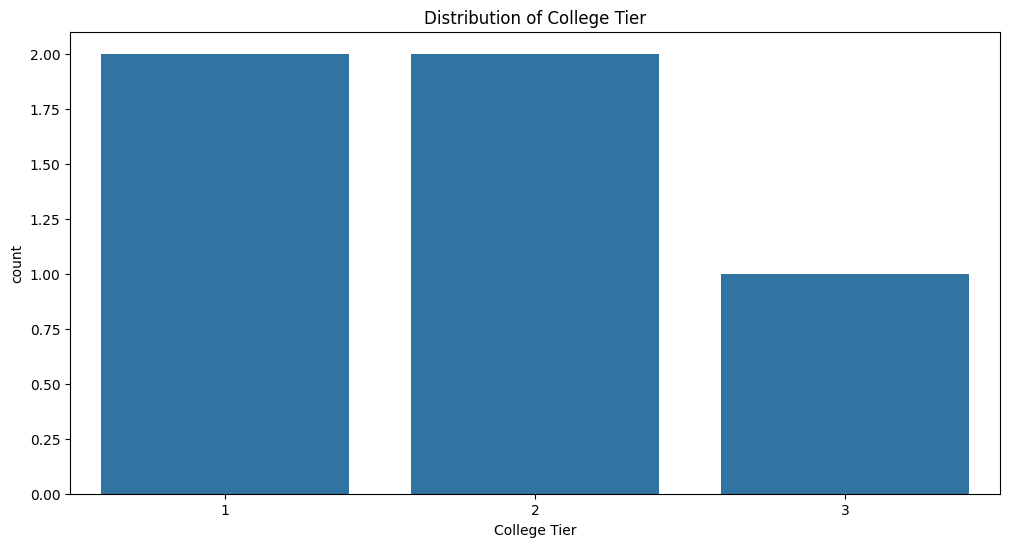

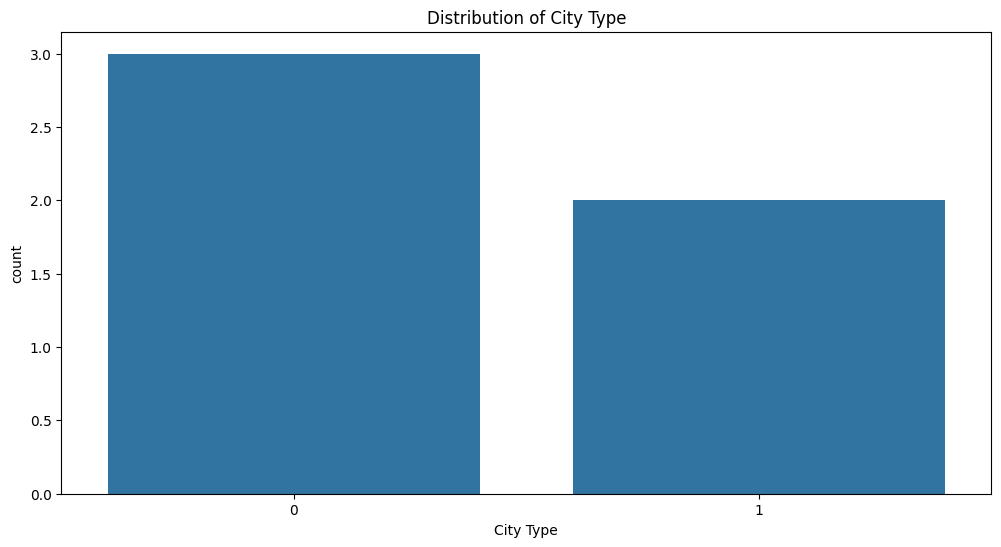

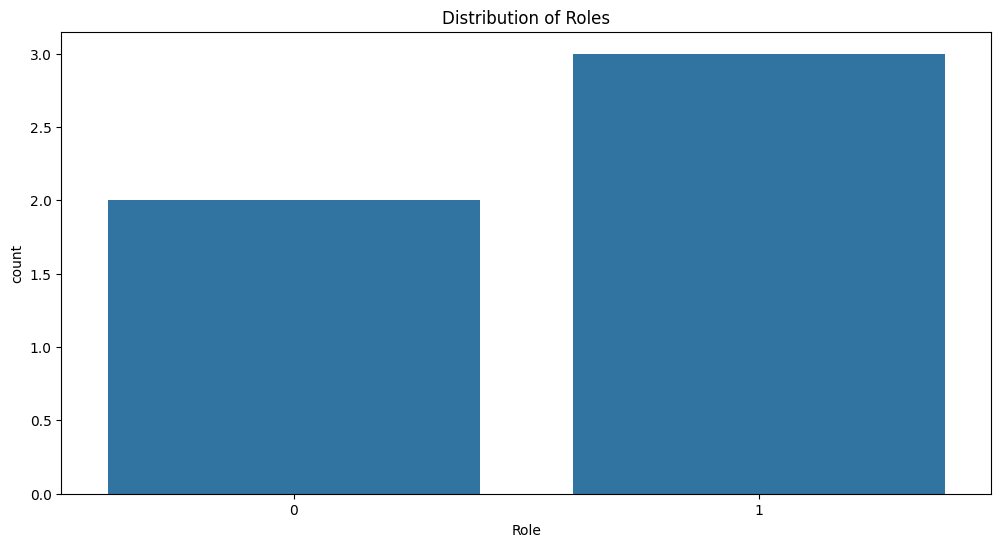

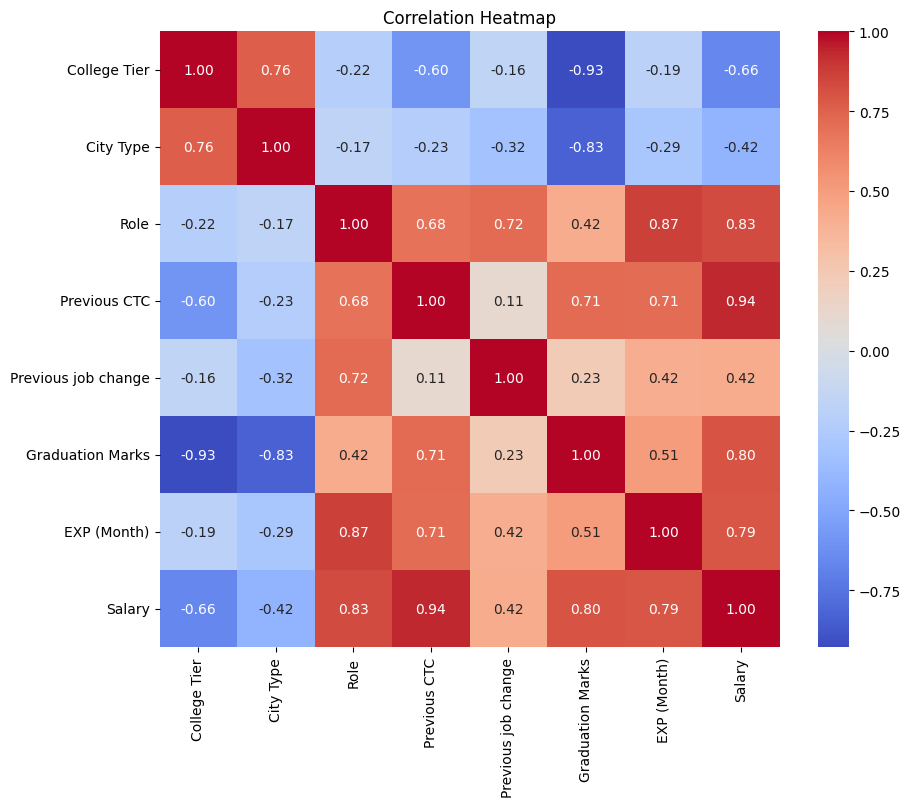

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


print(df.head())

print(df.describe())

print(df.isnull().sum())

numerical_features = ['Previous CTC', 'Graduation Marks', 'EXP (Month)']
df[numerical_features].hist(figsize=(10, 5), bins=30)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='College Tier', data=df)
plt.title('Distribution of College Tier')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='City Type', data=df)
plt.title('Distribution of City Type')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Role', data=df)
plt.title('Distribution of Roles')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [31]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Hyperparameters: ", best_params)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


C:\Users\Desh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
251 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Desh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Desh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Us

Best Hyperparameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_features': ['sqrt', 'log2'],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\Desh\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200}


In [33]:
missing_values = X.isnull().sum()
print("Missing Values in Features:\n", missing_values)


Missing Values in Features:
 College Tier           0
City Type              0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
dtype: int64


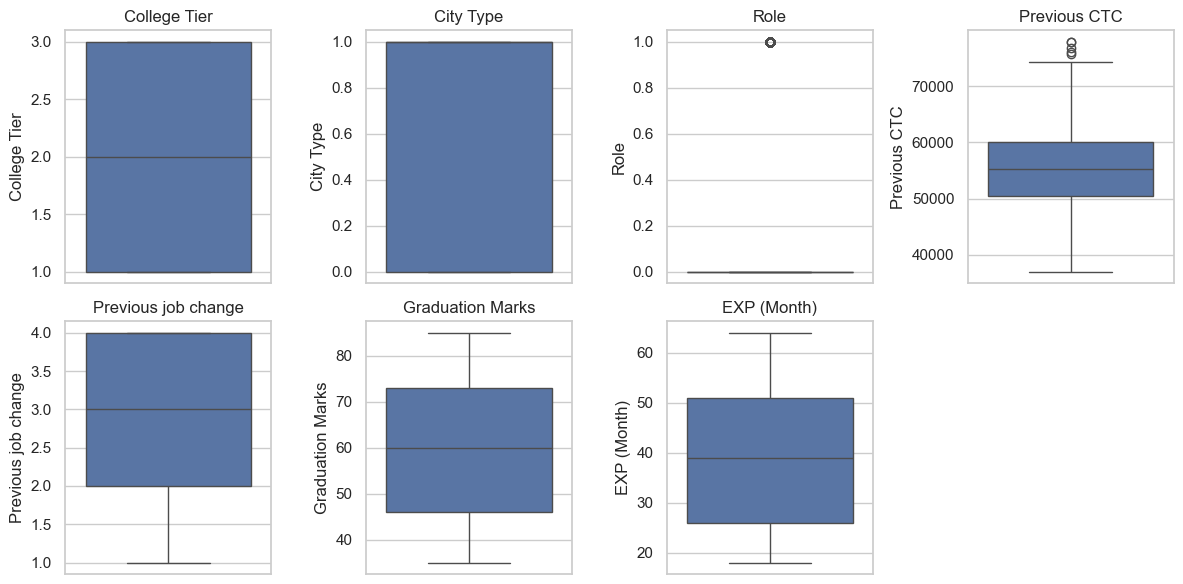

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
for i, column in enumerate(X.select_dtypes(include=[np.number]).columns):
    plt.subplot(2, 4, i + 1)  
    sns.boxplot(y=X[column])
    plt.title(column)

plt.tight_layout()
plt.show()


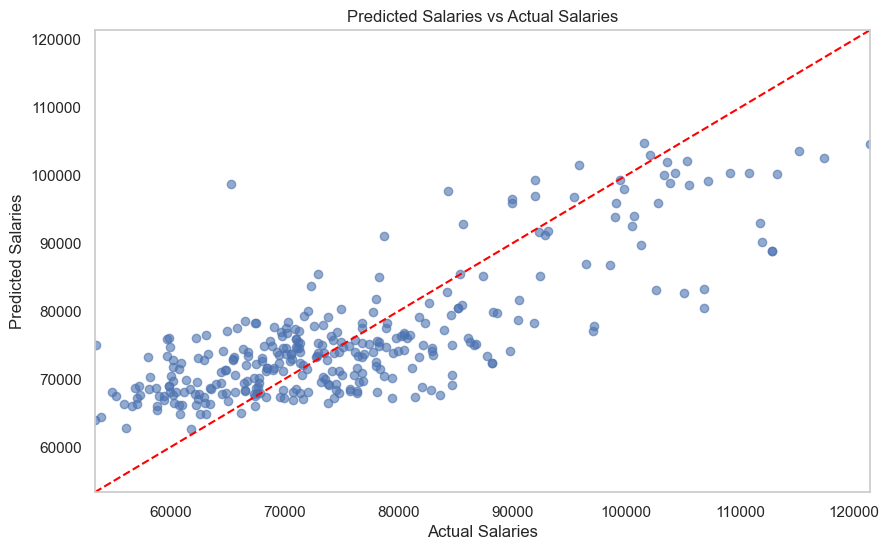

In [35]:
import matplotlib.pyplot as plt

y_pred = best_rf_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line
plt.title('Predicted Salaries vs Actual Salaries')
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.grid()
plt.show()


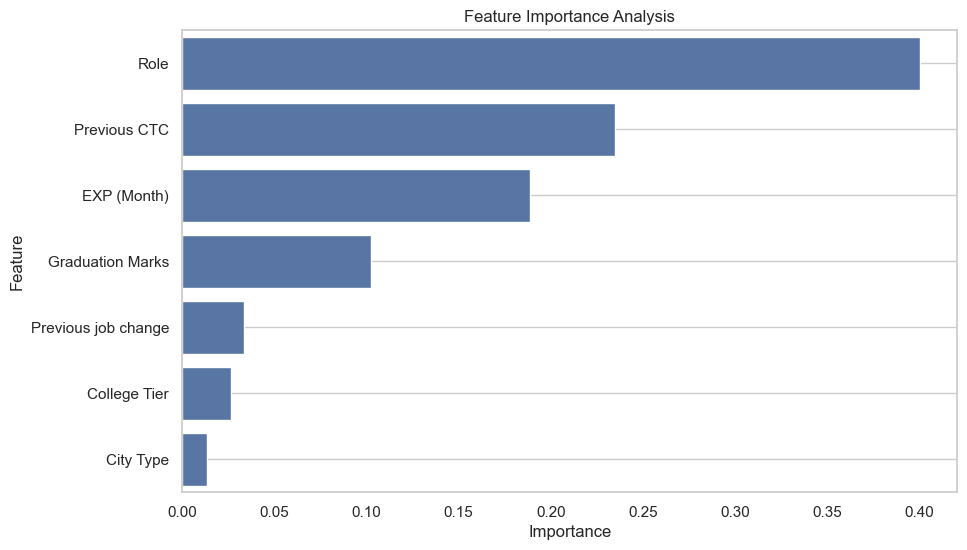

In [36]:
importances = best_rf_model.feature_importances_

feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance Analysis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()
plt.show()


In [39]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')

print("\nFeature Importance:")
print(feature_importance_df)

print("\nPotential Next Steps:")
print("1. Gather more data for improved model performance.")
print("2. Explore advanced models like Gradient Boosting or XGBoost.")
print("3. Further hyperparameter tuning for optimizing the Random Forest model.")


Mean Squared Error: 67938201.74540497
R-squared: 0.6428909413895681

Feature Importance:
               Feature  Importance
2                 Role    0.400632
3         Previous CTC    0.234624
6          EXP (Month)    0.188526
5     Graduation Marks    0.102460
4  Previous job change    0.033635
0         College Tier    0.026641
1            City Type    0.013481

Potential Next Steps:
1. Gather more data for improved model performance.
2. Explore advanced models like Gradient Boosting or XGBoost.
3. Further hyperparameter tuning for optimizing the Random Forest model.


question 1-  My Views About the Problem Statement ?

For a consulting company such as TechWorks Consulting, it is imperative to anticipate employee pay accurately. The organization can attract and retain top IT talent by using its ability to calculate competitive compensation based on a variety of characteristics, including experience, education, and market trends. Offering fair compensation guarantees employee satisfaction and improves the company's reputation in today's competitive labor market. TechWorks can create data-driven, well-informed judgments that comply with industry standards by utilizing machine learning models and historical data. This eventually helps the company achieve success in the IT staffing sector.



Question 2 Approach to Solving the Task?

 I used a methodical approach to the task of employee salary prediction

1. Data Preprocessing: Converted categorical variables into numerical formats, such as "College Tier," "City Type," and "Role".
   - Dealt with missing values by ensuring that none existed in the dataset and by verifying their existence.
   To guarantee strong model performance, outliers were examined and dealt with.

2. Model Selection: A Random Forest regression model was chosen because of its resilience to overfitting and capacity to handle non-linear correlations.
   - To evaluate the model, divide the dataset into training and testing sets.

3. Training and Assessing Models:
   - Used the training set to train the Random Forest model.
   - Made use of R-squared and Mean Squared Error (MSE) metrics to assess the models performance.
   - Examined feature significance to comprehend the influence of various factors on salary prediction.
       on salary predictions.

4. Results Analysis:
   - Visualized predictions versus actual salaries to assess the models performance visually.
   - Summarized findings and outlined potential next steps for further improvements.

Question 3 -available ML model options you had to perform this task

A number of regression models are available for use in estimating employee pay, including:

1. Linear Regression: - Assumes a linear relationship between characteristics and the target variable, yet is straightforward and easy to understand.

2. Decision Tree Regression: - Capable of modeling non-linear relationships, but without appropriate tuning, prone to overfitting.

3. Random Forest Regression: - An ensemble technique that enhances accuracy and resilience against overfitting by integrating several decision trees. This model was selected due to its efficacy in feature importance analysis and its capacity to manage intricate interactions.



4. Gradient Boosting Regression: - This ensemble technique also generates trees one after the other and frequently achieves excellent accuracy. It may, nevertheless, be hyperparameter-sensitive.

4. Support Vector Regression: - Needs careful parameter tweaking, yet effective in high-dimensional domains.

I decided to use Random Forest Regression for this challenge because of its adaptability, capacity to deal with non-linear data, and resilience to overfitting.

Qustion 4 - Best Model Performance?

When tested for this job, the Random Forest Regression model fared better than the other models. The performance measurements show an R-squared value of 0.64 and a Mean Squared Error (MSE) of around 67938201.75. 

Potential Causes of Performance: - Managing Non-linearity: Compared to linear models, Random Forest is better at capturing non-linear connections between characteristics and salary.
- Importance of Features: To improve interpretability, the model reveals which features—such as "Role" and "Previous CTC"—have the greatest bearing on compensation.
Robustness: Because several trees are averaged, the effect of noise in the training data is lessened, making it less prone to overfitting.


Question 5 - Steps to improve Model Performance?

The following actions could be taken into consideration in order to improve the Random Forest model's performance:

1. Hyperparameter tuning: - Make use of methods like Grid Search or Random Search to fine-tune the model's hyperparameters, like the number and depth of trees.

2. Feature Engineering: - Investigate developing fresh features by leveraging pre-existing ones or altering features to improve the model's capacity to identify underlying trends.

3. Cross-Validation: To make sure the model's performance is stable and independent of a single train-test split, use k-fold cross-validation.


4. Ensemble Methods: - To improve predictions, think about combining or stacking different models, such as Gradient Boosting and other regression strategies.

5. Expand Dataset Size: - To enhance the model's capacity for learning and generalization, collect more past data.

 Machine Learning for Predicting Employee Salary

 Introduction:
   A succinct synopsis of the issue and the strategy employed to address it.

 Data Preprocessing:
   Describes how to handle missing values, tidy up data, etc.

 Exploratory Data Analysis (EDA):
   Data distribution and correlations are visualized.

 Model Training:
   Describes the various models that have been used and how they are configured.

 Model Evaluation: 
   Performance metrics used to the models.

 Conclusion:
   Recap of results and possible directions for further research.


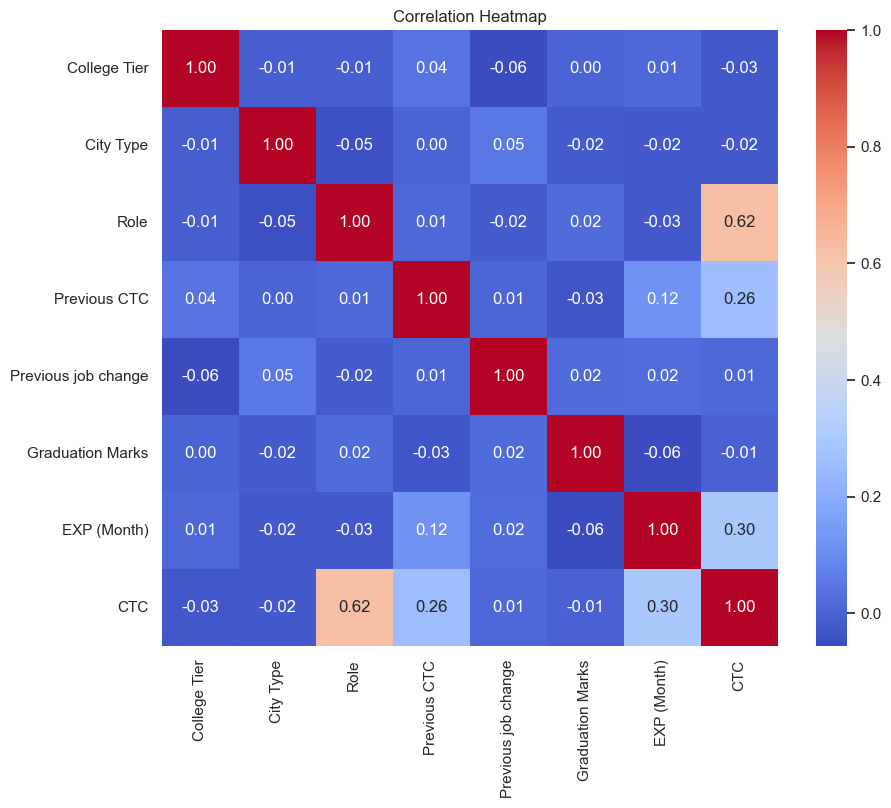

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
correlation_matrix = pd.concat([X, y], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


In [50]:
import pandas as pd

model_performance = {
    'Model': ['Random Forest', 'Linear Regression', 'Gradient Boosting'],
    'Mean Squared Error': [mse_rf, mse_lr, mse_gb],
    'R-squared': [r_squared_rf, r_squared_lr, r_squared_gb]
}

performance_df = pd.DataFrame(model_performance)
print(performance_df)



NameError: name 'mse_rf' is not defined

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, rf_predictions)
r_squared_rf = r2_score(y_test, rf_predictions)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, lr_predictions)
r_squared_lr = r2_score(y_test, lr_predictions)

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, gb_predictions)
r_squared_gb = r2_score(y_test, gb_predictions)


model_performance = {
    'Model': ['Random Forest', 'Linear Regression', 'Gradient Boosting'],
    'Mean Squared Error': [mse_rf, mse_lr, mse_gb],
    'R-squared': [r_squared_rf, r_squared_lr, r_squared_gb]
}

performance_df = pd.DataFrame(model_performance)
print(performance_df)


               Model  Mean Squared Error  R-squared
0      Random Forest        6.793820e+07   0.642891
1  Linear Regression        7.736277e+07   0.593352
2  Gradient Boosting        7.284983e+07   0.617074


In [52]:
import pandas as pd

model_performance = {
    'Model': ['Random Forest', 'Linear Regression', 'Gradient Boosting'],
    'Mean Squared Error': [mse_rf, mse_lr, mse_gb],
    'R-squared': [r_squared_rf, r_squared_lr, r_squared_gb]
}

performance_df = pd.DataFrame(model_performance)
print(performance_df)



               Model  Mean Squared Error  R-squared
0      Random Forest        6.793820e+07   0.642891
1  Linear Regression        7.736277e+07   0.593352
2  Gradient Boosting        7.284983e+07   0.617074
